In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from matplotlib import pyplot as plt 
import seaborn as sns

import math as math
import cmath as cmath
from scipy import integrate

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# set parameters and constants
r = 0
k = 2
V0 = 0.01
sigma = 0.6
theta = 0.02
kappa = 6.21
T1 = 10
rho = -0.5

S0 = np.arange(0.5,4,0.01)

In [3]:
time_maturity = 3
num_simulations = 100
n = 250 # numbers of division of the time 

In [4]:
S0 = np.arange(0.5,4,0.01)

In [5]:
# characteristic function
def f(phi, kappa, theta, sigma, rho, v0, r, T, s0, status):
    
    a = kappa * theta
    x = math.log(s0)
    
    # remind that lamda is zero
    if status == 1:
        u = 0.5
        b = kappa - rho * sigma
    else:
        u = -0.5
        b = kappa
    
    d = cmath.sqrt((rho * sigma * phi * 1j - b)**2 - sigma**2 * (2 * u * phi * 1j - phi**2))
    g = (b - rho * sigma * phi * 1j + d) / (b - rho * sigma * phi * 1j - d)
    
    C = r * phi * 1j * T + (a / sigma**2)*((b - rho * sigma * phi * 1j + d) * T - 2 * cmath.log((1 - g * cmath.exp(d * T))/(1 - g)))
    D = (b - rho * sigma * phi * 1j + d) / sigma**2 * ((1 - cmath.exp(d * T)) / (1 - g * cmath.exp(d * T)))
    
    return cmath.exp(C + D * v0 + 1j * phi * x)

In [6]:
# P1 and P2
def p(kappa, theta, sigma, rho, v0 ,r ,T ,s0 , K, status):
    
    
    integrand = lambda phi: (cmath.exp(-1j * phi * cmath.log(K)) * f(phi, kappa, \
                              theta, sigma, rho, v0, r, T, s0, status) / (1j * phi)).real 
    
    return (0.5 + (1 / math.pi) * integrate.quad(integrand, 0, 100)[0]) # approximate indefinite intergral with a definite one

def p1(kappa, theta, sigma, rho, v0 ,r ,T ,s0 ,K):
    return p(kappa, theta, sigma, rho, v0 ,r ,T ,s0 ,K, 1)

def p2(kappa, theta, sigma, rho, v0 ,r ,T ,s0 ,K):
    return p(kappa, theta, sigma, rho, v0 ,r ,T ,s0 ,K, 2)


In [7]:
# call price
def call_price(kappa, theta, sigma, rho, v0 ,r ,T ,s0 ,K):
    
    P1 = p1(kappa, theta, sigma, rho, v0 ,r ,T ,s0 ,K)
    P2 = p2(kappa, theta, sigma, rho, v0 ,r ,T ,s0 ,K)
    
    result = (s0 * P1 - K * math.exp(-r * T) * P2)
    
    if result<0:
        result = 0
        
    return result

In [8]:
num_price = []
for s0 in S0:
    c = call_price(kappa, theta, sigma, rho, V0, r, time_maturity, s0, k)
    num_price.append(c)

In [9]:
df = pd.read_csv("datasets/df1.csv")
df = df.drop("Unnamed: 0", axis=1)
df.head()

,stock_zero,price
0,0.524303,0.0
1,0.522428,0.0
2,0.499181,0.0
3,0.494353,0.0
4,0.502161,0.0


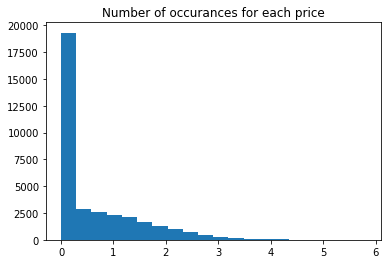

In [10]:
plt.hist(df.price, bins =20)
plt.title("Number of occurances for each price")
plt.show()

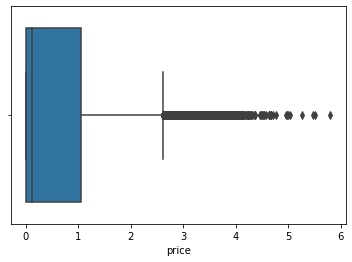

In [11]:
sns.boxplot(x=df.price);

In [12]:
y = df.price
X = df.stock_zero

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [13]:
lin = LinearRegression()
lin.fit(x_train, y_train)
y_pred_lin = lin.predict(x_test)

print("ridge SMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lin)))

ValueError: Expected 2D array, got 1D array instead:
array=[3.25868177 0.75055982 0.89285998 ... 1.02405099 2.3732773  3.96555708].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [44]:
price_linear = lin.predict(S0)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.